In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score,recall_score,precision_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Fraud_check.csv')

### EDA

In [4]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df['Undergrad'].unique()

array(['NO', 'YES'], dtype=object)

In [7]:
df['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [8]:
df['Urban'].unique()

array(['YES', 'NO'], dtype=object)

In [9]:
df.rename(columns= {'Taxable.Income':'taxable_income'},inplace=True)

In [10]:
def classify(taxable_income):
    if taxable_income <= 30000:
        return "Risky"
    else:
        return "Good"

In [11]:
df['taxable_income'] = df['taxable_income'].apply(classify)

<AxesSubplot:xlabel='taxable_income', ylabel='count'>

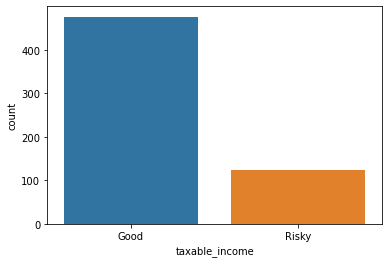

In [12]:
sns.countplot(x=df['taxable_income'])

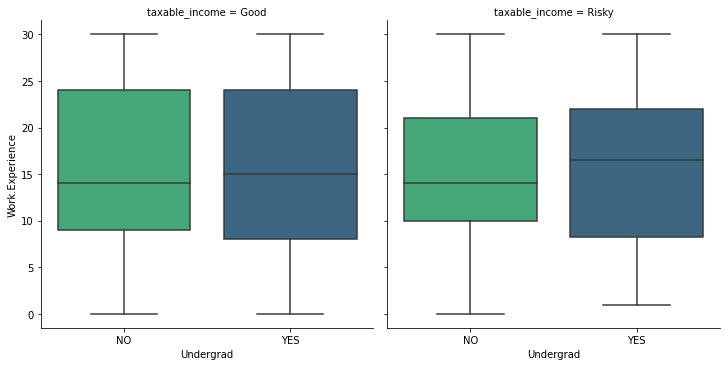

In [13]:
sns.catplot(x='Undergrad',y='Work.Experience',data=df,kind='box',col='taxable_income',palette='viridis_r')

In [14]:
df

,Undergrad,Marital.Status,taxable_income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


### Feature Encoding

In [15]:
X = df.drop('taxable_income',axis=1)

In [16]:
X = X.apply(LabelEncoder().fit_transform)

In [17]:
# df['taxable_income'] = LabelEncoder().fit_transform(df['taxable_income'])

In [18]:
y = df['taxable_income']

In [19]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,84,10,1
1,1,0,398,18,1
2,0,1,481,30,1
3,1,2,574,15,1
4,0,1,4,28,0
...,...,...,...,...,...
595,1,0,55,7,1
596,1,0,107,2,1
597,0,0,459,0,1
598,1,1,533,17,0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Random Forest Model (build & validation)

In [21]:
rfc = RandomForestClassifier(random_state=14)

In [22]:
n_estimators=[90,100,120]
max_features= [2,3,4,5]
criterion= ['gini','entropy']

In [23]:
param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'criterion':criterion}

In [24]:
gsv = GridSearchCV(estimator=rfc,param_grid=param_grid)

In [25]:
gsv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=14),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [90, 100, 120]})

In [26]:
gsv.best_params_

{'criterion': 'entropy', 'max_features': 5, 'n_estimators': 120}

In [27]:
y_pred = gsv.predict(X_test)

In [28]:
print(confusion_matrix(y_test,y_pred))

[[127  10]
 [ 40   3]]


In [29]:
accuracy_score(y_test,y_pred)

0.7222222222222222

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.76      0.93      0.84       137
       Risky       0.23      0.07      0.11        43

    accuracy                           0.72       180
   macro avg       0.50      0.50      0.47       180
weighted avg       0.63      0.72      0.66       180



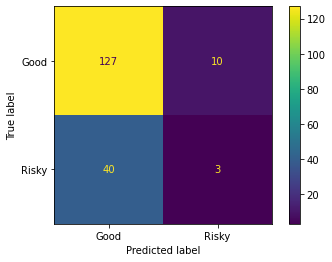

In [31]:
plot_confusion_matrix(gsv,X_test,y_test)

### Boosting 

In [67]:
from sklearn.ensemble import AdaBoostClassifier

In [68]:
model = AdaBoostClassifier(n_estimators=90)
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=90)

In [69]:
y_pred = model.predict(X_test)

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.65      0.59      0.62       150
       Risky       0.59      0.65      0.62       136

    accuracy                           0.62       286
   macro avg       0.62      0.62      0.62       286
weighted avg       0.63      0.62      0.62       286



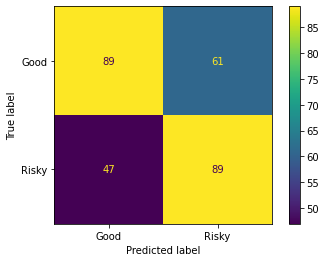

In [71]:
plot_confusion_matrix(model,X_test,y_test)

In [74]:
accuracy = []
recall = []
precision = []

for n in range(1,96):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test,preds)
    rec = recall_score(y_test,preds,pos_label='Risky')
    pre = precision_score(y_test,preds,pos_label='Good')
    accuracy.append(acc)
    recall.append(rec)
    precision.append(pre)
    

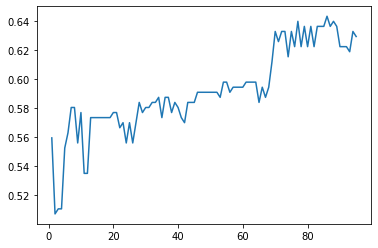

In [75]:
plt.plot(range(1,96),accuracy)

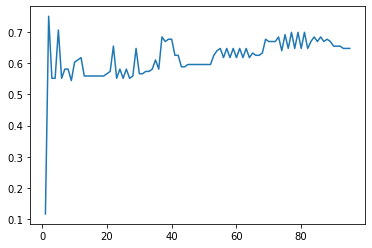

In [76]:
plt.plot(range(1,96),recall)

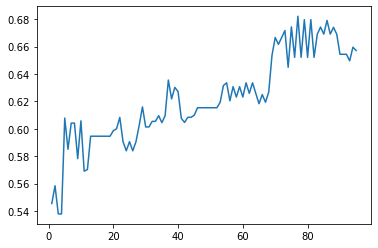

In [77]:
plt.plot(range(1,96),precision)

In [78]:
model = AdaBoostClassifier(n_estimators=90)
model.fit(X_train,y_train)
preds = model.predict(X_test)
acc = accuracy_score(y_test,preds)
rec = recall_score(y_test,preds,pos_label='Risky')
pre = precision_score(y_test,preds,pos_label='Good')

In [79]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

        Good       0.65      0.59      0.62       150
       Risky       0.59      0.65      0.62       136

    accuracy                           0.62       286
   macro avg       0.62      0.62      0.62       286
weighted avg       0.63      0.62      0.62       286



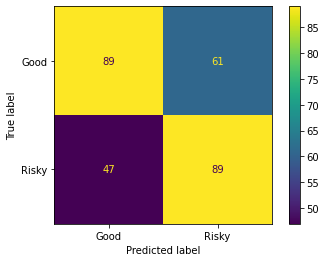

In [80]:
plot_confusion_matrix(model,X_test,y_test)

### Over-Sampling 

In [44]:
#Label class is heavily imbalanced hence we are getting bad recall & precision scores no matter what hyperparameters we choose.

from imblearn.over_sampling import RandomOverSampler

In [45]:
ros = RandomOverSampler(sampling_strategy='auto')

In [46]:
X_rs,y_rs = ros.fit_resample(X,y)

In [47]:
X_rs

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,84,10,1
1,1,0,398,18,1
2,0,1,481,30,1
3,1,2,574,15,1
4,0,1,4,28,0
...,...,...,...,...,...
947,1,1,569,22,1
948,1,1,226,8,0
949,0,1,288,29,0
950,1,1,291,24,0


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_rs,y_rs, test_size=0.3, random_state=10)

In [81]:
accuracy = []
recall = []
precision = []

for n in range(1,96):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_rs,y_rs)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test,preds)
    rec = recall_score(y_test,preds,pos_label='Risky')
    pre = precision_score(y_test,preds,pos_label='Good')
    accuracy.append(acc)
    recall.append(rec)
    precision.append(pre)
    

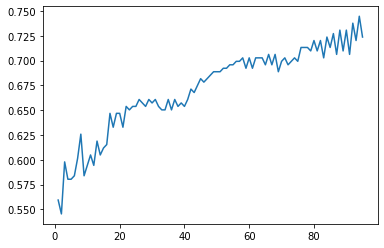

In [82]:
plt.plot(range(1,96),accuracy)

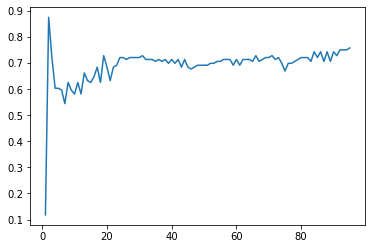

In [83]:
plt.plot(range(1,96),recall)

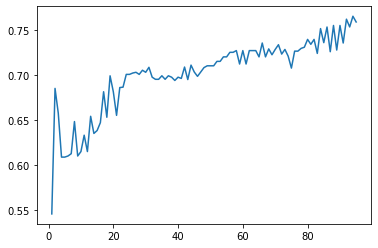

In [84]:
plt.plot(range(1,96),precision)

### New Grid-search

In [53]:
rfc = RandomForestClassifier(oob_score=True,random_state=14)

In [54]:
n_estimators=[90,100,120]
max_features= [2,3,4,5]
criterion= ['gini','entropy']

In [55]:
param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'criterion':criterion}

In [56]:
gsv = GridSearchCV(estimator=rfc,param_grid=param_grid)

In [57]:
gsv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(oob_score=True, random_state=14),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [90, 100, 120]})

In [58]:
gsv.best_params_

{'criterion': 'gini', 'max_features': 2, 'n_estimators': 90}

In [59]:
y_pred = gsv.predict(X_test)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.94      0.77      0.85       150
       Risky       0.79      0.95      0.86       136

    accuracy                           0.85       286
   macro avg       0.86      0.86      0.85       286
weighted avg       0.87      0.85      0.85       286



### Final Model

In [61]:
rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_features=3, oob_score=True,random_state=14)

In [62]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=3, oob_score=True, random_state=14)

In [63]:
y_pred = rfc.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred)

0.8566433566433567

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.96      0.76      0.85       150
       Risky       0.78      0.96      0.86       136

    accuracy                           0.86       286
   macro avg       0.87      0.86      0.86       286
weighted avg       0.88      0.86      0.86       286



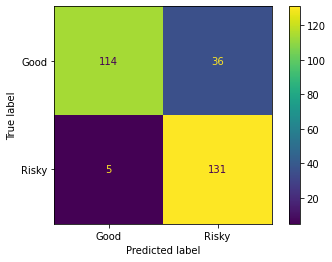

In [66]:
plot_confusion_matrix(rfc,X_test,y_test)

#### Here we are getting good accuracy,recall and percision scores.